In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -U tensorflow-addons

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
import PIL
import os
import os.path
from PIL import Image
f="/content/drive/My Drive/Ahaan/polar/NOLOAD/FML"
from numpy import asarray


# FML
# Delamination
# Discoloration
# Glass breakage
# Good Panel
# Snailtrail
#img = Image.open('Sample.png')
x_t=[]
y_t=[]
#x_ts=[]
#y_ts=[]
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img=img.convert('RGB')
    img = img.resize((32,32))
    numpydata = asarray(img)
    x_t.append(numpydata)
    y_t.append(1)
print("Size converted")
f="/content/drive/My Drive/Ahaan/polar/NOLOAD/GOOD"

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img=img.convert('RGB')
    img = img.resize((32,32))
    numpydata = asarray(img)
    x_t.append(numpydata)
    y_t.append(2)
print("Size converted")
f="/content/drive/My Drive/Ahaan/polar/NOLOAD/PPB"

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img=img.convert('RGB')
    img = img.resize((32,32))
    numpydata = asarray(img)
    x_t.append(numpydata)
    y_t.append(3)
print("Size converted")
f="/content/drive/My Drive/Ahaan/hht/NOLOAD/PPW"

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img=img.convert('RGB')
    img = img.resize((32,32))
    numpydata = asarray(img)
    x_t.append(numpydata)
    y_t.append(4)
print("Size converted")
f="/content/drive/My Drive/Ahaan/polar/NOLOAD/RFW"

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img=img.convert('RGB')
    img = img.resize((32,32))
    numpydata = asarray(img)
    x_t.append(numpydata)
    y_t.append(5)
print("Size converted")
f="/content/drive/My Drive/Ahaan/polar/NOLOAD/TSB"

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img=img.convert('RGB')
    img = img.resize((32,32))
    numpydata = asarray(img)
    x_t.append(numpydata)
    y_t.append(0)
print("Size converted")


Size converted
Size converted
Size converted
Size converted
Size converted
Size converted


In [ ]:
type(x_t),type(y_t)

(list, list)

In [ ]:
import numpy as np
X = np.array(x_t)
y = np.array(y_t)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_t, test_size=0.33, random_state=42)

In [ ]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [ ]:
num_classes = 6
input_shape = (32, 32, 3)

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (402, 32, 32, 3) - y_train shape: (402,)
x_test shape: (199, 32, 32, 3) - y_test shape: (199,)


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(72, 72),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

(-0.5, 31.5, 31.5, -0.5)

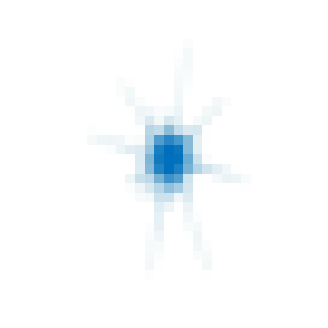

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

In [ ]:
i=0
loss=[]
accuracy=[]

In [ ]:
learning_rate = 0.0001
weight_decay = 0.00001
batch_size = 16 #256
num_epochs = 200
image_size = 72  # We'll resize input images to this size
patch_size = 6 # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 24
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


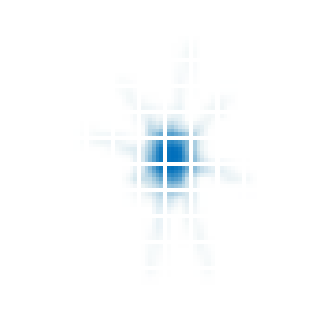

In [ ]:
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
y_train

array([2, 2, 5, 5, 2, 3, 3, 3, 3, 3, 5, 0, 0, 0, 2, 3, 2, 4, 1, 0, 1, 2,
       5, 1, 4, 4, 5, 4, 4, 1, 4, 1, 5, 3, 5, 0, 1, 5, 3, 5, 3, 0, 4, 5,
       2, 2, 4, 0, 5, 2, 1, 2, 1, 2, 0, 1, 1, 4, 3, 1, 3, 3, 4, 0, 2, 4,
       0, 3, 1, 2, 4, 4, 4, 1, 1, 4, 0, 5, 1, 1, 0, 5, 1, 5, 5, 4, 5, 4,
       3, 1, 5, 3, 1, 3, 1, 2, 3, 0, 2, 0, 4, 2, 0, 0, 0, 1, 4, 2, 4, 2,
       2, 2, 0, 4, 5, 4, 2, 4, 1, 5, 0, 2, 4, 5, 5, 3, 4, 4, 4, 5, 1, 4,
       1, 2, 3, 4, 0, 1, 2, 4, 4, 3, 0, 3, 2, 3, 0, 0, 1, 5, 4, 2, 4, 2,
       5, 0, 2, 5, 4, 4, 0, 2, 0, 1, 2, 3, 5, 1, 4, 3, 3, 5, 2, 2, 3, 4,
       3, 0, 5, 5, 5, 0, 4, 2, 0, 3, 4, 1, 3, 2, 0, 4, 5, 0, 4, 0, 5, 4,
       0, 3, 5, 5, 5, 2, 2, 5, 5, 5, 4, 4, 2, 0, 3, 4, 0, 2, 4, 2, 5, 2,
       0, 3, 3, 2, 2, 5, 4, 4, 3, 0, 5, 4, 2, 0, 3, 0, 1, 2, 0, 5, 2, 5,
       1, 2, 1, 3, 1, 3, 2, 4, 2, 1, 1, 1, 2, 2, 3, 5, 5, 3, 0, 1, 1, 3,
       0, 4, 0, 2, 5, 0, 1, 0, 0, 3, 4, 3, 4, 4, 3, 3, 1, 3, 0, 0, 5, 2,
       3, 5, 0, 0, 3, 4, 2, 1, 3, 3, 1, 5, 1, 1, 5,

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/200
23/23 [==============================] - 42s 428ms/step - loss: 3.2506 - accuracy: 0.2327 - top-5-accuracy: 0.8726 - val_loss: 1.6716 - val_accuracy: 0.2927 - val_top-5-accuracy: 0.8537
Epoch 2/200
23/23 [==============================] - 6s 271ms/step - loss: 2.7422 - accuracy: 0.3047 - top-5-accuracy: 0.9003 - val_loss: 1.4436 - val_accuracy: 0.4634 - val_top-5-accuracy: 1.0000
Epoch 3/200
23/23 [==============================] - 4s 177ms/step - loss: 2.2568 - accuracy: 0.3296 - top-5-accuracy: 0.9418 - val_loss: 1.4847 - val_accuracy: 0.3659 - val_top-5-accuracy: 1.0000
Epoch 4/200
23/23 [==============================] - 4s 160ms/step - loss: 2.2201 - accuracy: 0.3712 - top-5-accuracy: 0.9529 - val_loss: 2.7978 - val_accuracy: 0.2927 - val_top-5-accuracy: 1.0000
Epoch 5/200
23/23 [==============================] - 4s 161ms/step - loss: 2.1463 - accuracy: 0.3490 - top-5-accuracy: 0.9557 - val_loss: 1.2724 - val_accuracy: 0.3659 - val_top-5-accuracy: 1.0000
Epoch 6/200
23

Text(0, 0.5, 'Loss')

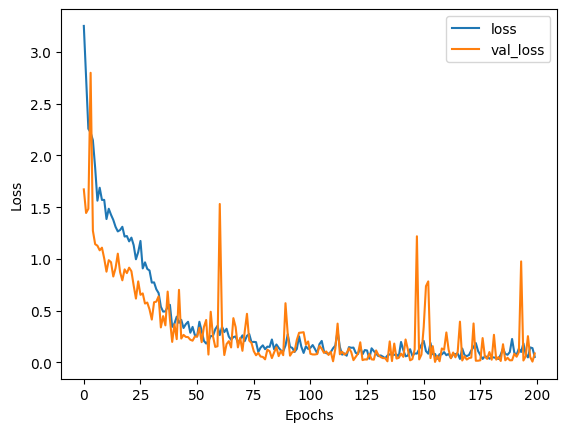

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

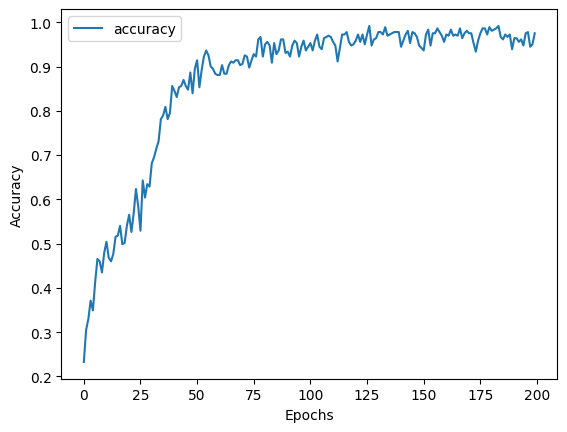

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy']].plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
loss.append([history_df['loss'].to_numpy().reshape(1,-1)])
accuracy.append([history_df['accuracy'].to_numpy().reshape(1,-1)])

In [ ]:
pred=vit_classifier.predict(x_test)
pred

7/7 [==============================] - 4s 86ms/step


array([[-4.583648  ,  4.292508  , 11.21482   , -3.4748724 , -1.5084109 ,
        -3.6052547 ],
       [ 6.397468  , -3.3833454 , -7.1861386 , -4.27985   , -3.6562533 ,
        13.714385  ],
       [ 6.5920515 , -0.47764826, -2.8951888 ,  2.2266061 , -2.9427798 ,
         0.41759706],
       ...,
       [ 7.318081  , -4.4102416 , -7.7158217 , -3.879015  , -3.716901  ,
        13.860802  ],
       [-4.1099405 , -8.821646  ,  0.7796023 ,  0.63464564, 27.69577   ,
        -6.275436  ],
       [ 6.6945624 , -3.51923   , -6.048465  , -2.6792562 , -3.3477907 ,
        10.296281  ]], dtype=float32)

In [ ]:
len(x_test)

199

In [ ]:
pr=np.argmax(pred,axis=1)
pr

array([2, 5, 0, 1, 2, 3, 1, 5, 1, 4, 1, 2, 2, 3, 4, 3, 1, 3, 1, 1, 1, 0,
       5, 0, 2, 0, 1, 2, 0, 5, 0, 2, 1, 3, 2, 5, 2, 0, 5, 3, 4, 1, 0, 0,
       1, 2, 5, 2, 1, 5, 3, 3, 2, 0, 0, 4, 3, 2, 2, 2, 1, 2, 4, 3, 0, 1,
       0, 0, 1, 4, 4, 1, 5, 4, 5, 0, 4, 3, 0, 5, 3, 5, 0, 4, 1, 1, 2, 3,
       4, 3, 3, 0, 1, 4, 0, 3, 3, 1, 5, 1, 1, 3, 0, 4, 1, 5, 2, 3, 3, 5,
       2, 5, 0, 0, 4, 4, 4, 2, 5, 5, 2, 1, 4, 0, 1, 2, 0, 3, 3, 5, 1, 0,
       2, 2, 5, 2, 1, 1, 3, 1, 1, 3, 2, 1, 5, 2, 4, 5, 1, 1, 0, 0, 4, 4,
       0, 3, 1, 5, 2, 1, 4, 3, 1, 5, 4, 2, 0, 3, 0, 4, 3, 3, 0, 4, 2, 1,
       5, 1, 1, 3, 2, 3, 0, 5, 5, 4, 4, 5, 4, 5, 5, 0, 1, 3, 5, 3, 5, 4,
       5])

In [ ]:
len(pr)

199

In [ ]:
for i in range(len(pr[:5])):
  print(pr[i],y_test[i])

2 2
5 5
0 0
1 1
2 2


In [ ]:
labels = ['TSB','FML','GOOD','PPB','PPW','RFW']

[[31  0  0  3  0  2]
 [ 0 39  0  0  0  0]
 [ 0  2 30  0  0  0]
 [ 2  0  0 30  0  1]
 [ 0  0  1  0 28  0]
 [ 0  0  0  0  0 30]] 

              precision    recall  f1-score   support

           0     0.9394    0.8611    0.8986        36
           1     0.9512    1.0000    0.9750        39
           2     0.9677    0.9375    0.9524        32
           3     0.9091    0.9091    0.9091        33
           4     1.0000    0.9655    0.9825        29
           5     0.9091    1.0000    0.9524        30

    accuracy                         0.9447       199
   macro avg     0.9461    0.9455    0.9450       199
weighted avg     0.9455    0.9447    0.9443       199
 



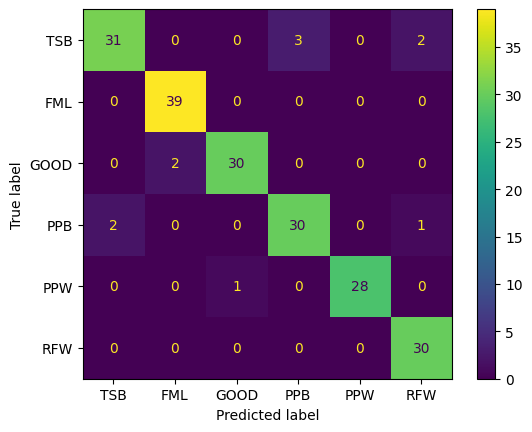

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import numpy as np
from keras import layers
rf_cm=confusion_matrix(y_test,pr)
print(rf_cm,"\n")
print(classification_report(y_test,pr,digits=4),"\n")
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels=labels)
disp.plot()
plt.show()

In [ ]:
i=True

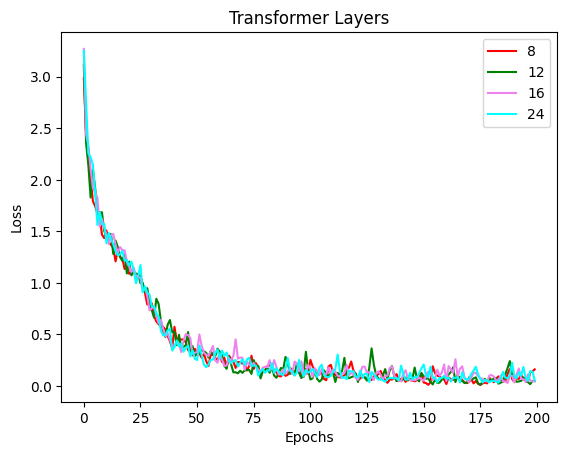

In [ ]:
if i == True:
  plt.plot(range(0,200), loss[0][0][0], color='red', label='8')
  plt.plot(range(0,200), loss[1][0][0], color='green', label='12')
  plt.plot(range(0,200), loss[2][0][0], color='violet', label='16')
  plt.plot(range(0,200), loss[3][0][0], color='cyan', label='24')
  #plt.plot(range(0,200), loss[4][0][0], color='orange', label='0.00001')
  #plt.plot(range(0,200), loss[4][0][0], color='cyan', label=')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Transformer Layers')
  plt.legend()
  plt.show()

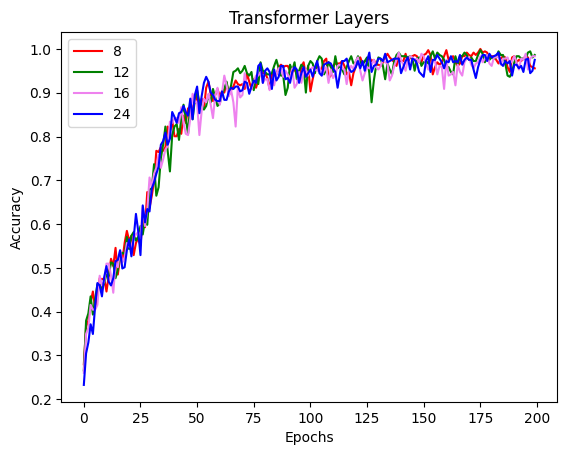

In [ ]:
if i == True:
  plt.plot(range(0,200), accuracy[0][0][0], color='red', label='8')
  plt.plot(range(0,200), accuracy[1][0][0], color='green', label='12')
  plt.plot(range(0,200), accuracy[2][0][0], color='violet', label='16')
  plt.plot(range(0,200), accuracy[3][0][0], color='blue', label='24')
  #plt.plot(range(0,200), accuracy[4][0][0], color='orange', label='0.00001')
  #plt.plot(range(0,200),accuracy[5][0][0],color='yellow',label='')

  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Transformer Layers')
  plt.legend()
  plt.show()

In [ ]:
print(i)

True
